In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../bases_dados/census.csv')

In [3]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
np.unique(df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

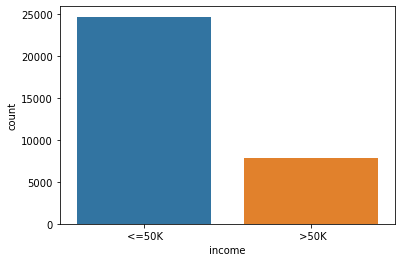

In [5]:
sns.countplot(x=df['income']);

In [6]:
x_census = df.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [7]:
y_census = df.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_workclass = LabelEncoder()
label_education = LabelEncoder()
label_marital = LabelEncoder()
label_occupation = LabelEncoder()
label_relationship = LabelEncoder()
label_race = LabelEncoder()
label_sex = LabelEncoder()
label_country = LabelEncoder()

In [10]:
x_census[:,1] = label_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_education.fit_transform(x_census[:,3])
x_census[:,5] = label_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_race.fit_transform(x_census[:,8])
x_census[:,9] = label_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_country.fit_transform(x_census[:,13])

In [11]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

## Subamostragem com Tomek Links

In [15]:
from imblearn.under_sampling import TomekLinks

In [17]:
tl = TomekLinks(sampling_strategy='majority')
x_under, y_under = tl.fit_resample(x_census, y_census)

In [18]:
x_under.shape, y_under.shape

((30162, 14), (30162,))

In [19]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [20]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22321,  7841], dtype=int64))

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [56]:
onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
x_census = onehot.fit_transform(x_under).toarray()
x_census

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [58]:
x_census.shape, x_under.shape

((30162, 108), (30162, 14))

In [59]:
from sklearn.model_selection import train_test_split
x_census_treinamento_under, x_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(x_under, y_under, test_size=0.15, random_state=0)

In [60]:
x_census_treinamento_under.shape, x_census_teste_under.shape

((25637, 14), (4525, 14))

In [61]:
# 84.70% com os dados originais

from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(x_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
previsoes = random_forest_census.predict(x_census_teste_under)

In [64]:
accuracy_score(y_census_teste_under, previsoes)

0.8656353591160221

## Sobreamostragem com SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(sampling_strategy='minority')

In [48]:
x_census.shape

(32561, 14)

In [50]:
x_over, y_over = smote.fit_resample(x_census, y_census)

In [51]:
x_over.shape

(49440, 14)

In [53]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [54]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

In [55]:
onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
x_census = onehot.fit_transform(x_over).toarray()
x_census

array([[   0.        ,    0.        ,    0.        , ..., 2174.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   13.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 8040.78419492,
           0.        ,   42.8221284 ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        2871.43981852,   65.19426356],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   54.58428015]])

In [66]:
x_census_treinamento_over, x_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(x_over, y_over, test_size=0.15, random_state=0)

In [67]:
x_census_treinamento_over.shape, x_census_teste_over.shape

((42024, 14), (7416, 14))

In [68]:
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(x_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [69]:
previsoes = random_forest_census.predict(x_census_teste_over)

In [70]:
accuracy_score(y_census_teste_over, previsoes)

0.9114077669902912